# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [5]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

# import the function to add some noise
from skimage.util import random_noise


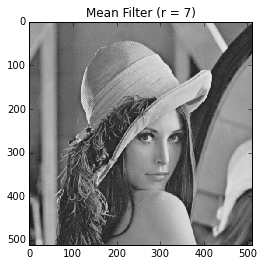

In [23]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)


## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

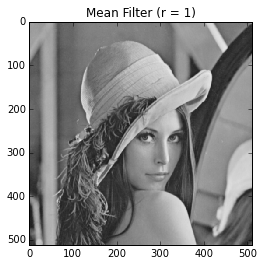

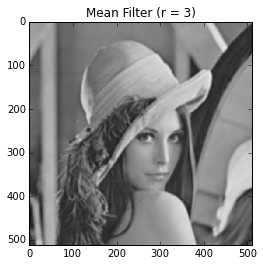

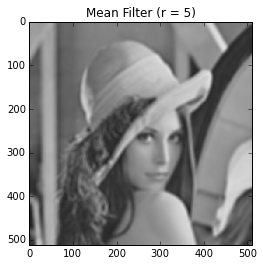

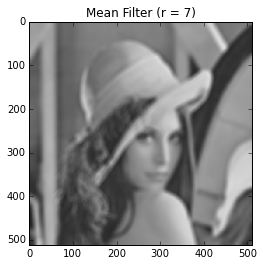

In [10]:
avg = mean(lena_im, disk(1))
plt.figure()
io.imshow(avg)
plt.title('Mean Filter (r = 1)')   

avg = mean(lena_im, disk(3))
plt.figure()
io.imshow(avg)
plt.title('Mean Filter (r = 3)')  

avg = mean(lena_im, disk(5))
plt.figure()
io.imshow(avg)
plt.title('Mean Filter (r = 5)')  

avg = mean(lena_im, disk(7))
plt.figure()
io.imshow(avg)
plt.title('Mean Filter (r = 7)')  

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

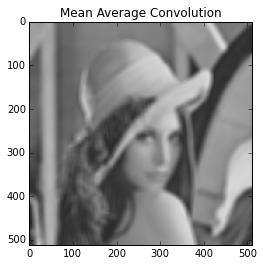

In [34]:
from scipy import ndimage
s = (14, 14)
mask = np.array(np.ones(s)/196)

avgC = ndimage.filters.convolve(lena_im, mask)

plt.figure()
io.imshow(avgC)
plt.title('Mean Average Convolution') 


Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [35]:
from skimage import filters

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

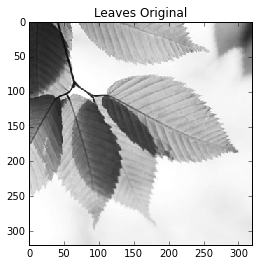

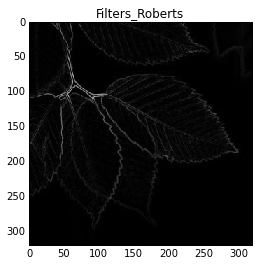

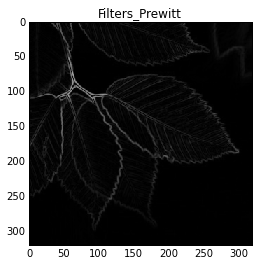

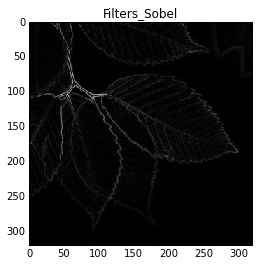

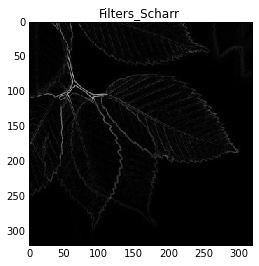

In [46]:
Path = './images/'
leave_im = io.imread(Path.__add__('leaves.jpg'), as_grey=True)
leave_im = img_as_float(leave_im)

plt.figure()
io.imshow(leave_im)
plt.title('Leaves Original') 

rob = filters.roberts(leave_im)
plt.figure()
io.imshow(rob)
plt.title('Filters_Roberts') 

prewitt = filters.prewitt(leave_im)
plt.figure()
io.imshow(prewitt)
plt.title('Filters_Prewitt') 

sobel = filters.roberts(leave_im)
plt.figure()
io.imshow(sobel)
plt.title('Filters_Sobel') 

scharr = filters.roberts(leave_im)
plt.figure()
io.imshow(scharr)
plt.title('Filters_Scharr') 

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

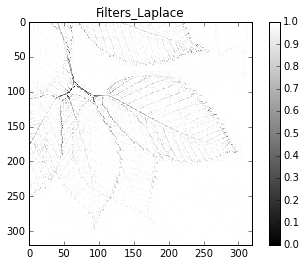

In [81]:
lap = ndimage.filters.laplace(leave_im)

lap = 1 - lap
#im=(im-min(im(:)))/(max(im(:))-min(im(:)))

plt.figure()
io.imshow(lap, cmap = cm.gray, vmin = 0, vmax = 1)
plt.title('Filters_Laplace') 

## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [50]:
from skimage import util

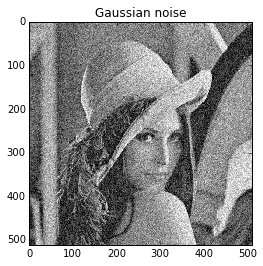

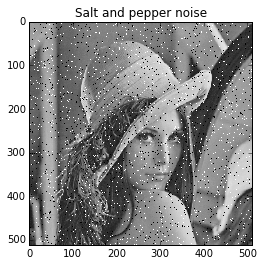

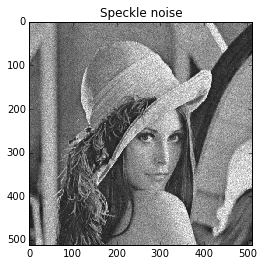

In [51]:

# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

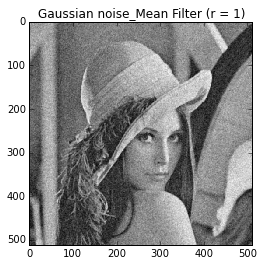

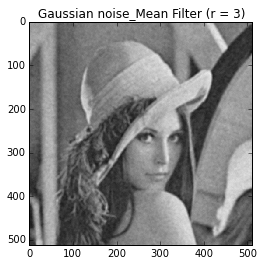

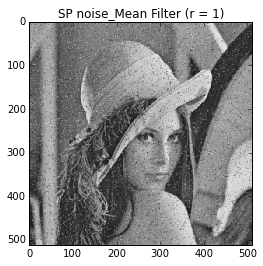

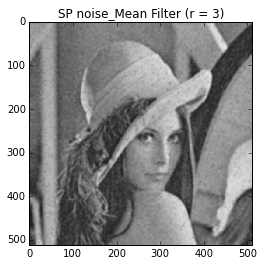

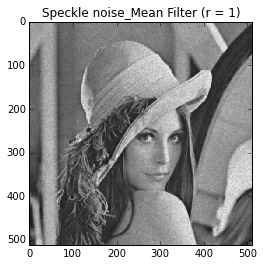

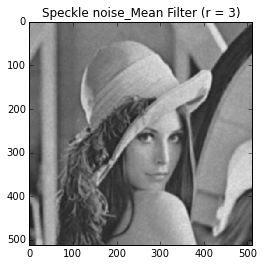

In [56]:
avg = mean(lena_gaussian, disk(1))
plt.figure()
io.imshow(avg)
plt.title('Gaussian noise_Mean Filter (r = 1)')   

avg = mean(lena_gaussian, disk(3))
plt.figure()
io.imshow(avg)
plt.title('Gaussian noise_Mean Filter (r = 3)')  

avg = mean(lena_sp, disk(1))
plt.figure()
io.imshow(avg)
plt.title('SP noise_Mean Filter (r = 1)')   

avg = mean(lena_sp, disk(3))
plt.figure()
io.imshow(avg)
plt.title('SP noise_Mean Filter (r = 3)') 

avg = mean(lena_speckle, disk(1))
plt.figure()
io.imshow(avg)
plt.title('Speckle noise_Mean Filter (r = 1)')   

avg = mean(lena_speckle, disk(3))
plt.figure()
io.imshow(avg)
plt.title('Speckle noise_Mean Filter (r = 3)') 

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

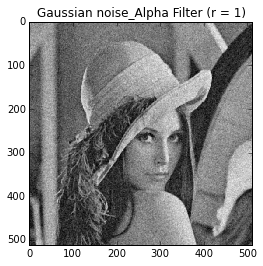

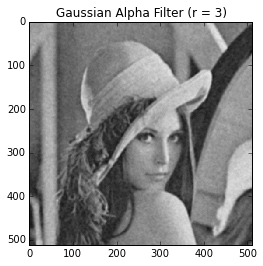

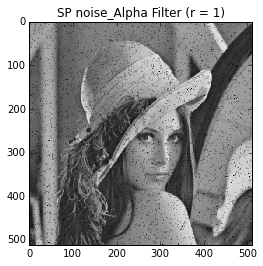

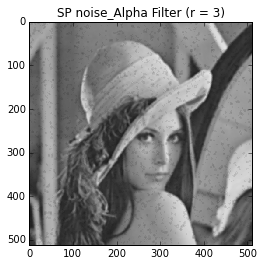

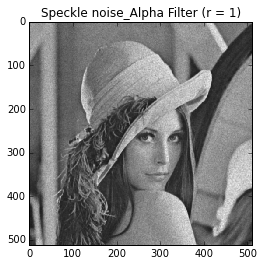

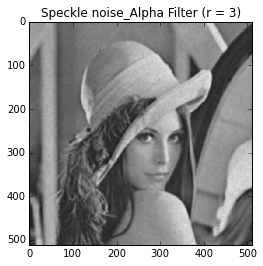

In [76]:
from skimage.filters.rank import mean_percentile

avg = mean_percentile(lena_gaussian, disk(1), None, None, False, False, 0.05, 0.95)
plt.figure()
io.imshow(avg)
plt.title('Gaussian noise_Alpha Filter (r = 1)')  

avg = mean_percentile(lena_gaussian, disk(3),None, None, False, False, 0.05, 0.95)
plt.figure()
io.imshow(avg)
plt.title('Gaussian Alpha Filter (r = 3)')  

avg = mean_percentile(lena_sp, disk(1),None, None, False, False, 0.05, 0.95)
plt.figure()
io.imshow(avg)
plt.title('SP noise_Alpha Filter (r = 1)')   

avg = mean_percentile(lena_sp, disk(3),None, None, False, False, 0.05, 0.95)
plt.figure()
io.imshow(avg)
plt.title('SP noise_Alpha Filter (r = 3)') 

avg = mean_percentile(lena_speckle, disk(1),None, None, False, False, 0.05, 0.95)
plt.figure()
io.imshow(avg)
plt.title('Speckle noise_Alpha Filter (r = 1)')   

avg = mean_percentile(lena_speckle, disk(3),None, None, False, False, 0.05, 0.95)
plt.figure()
io.imshow(avg)
plt.title('Speckle noise_Alpha Filter (r = 3)') 

** median filter: **

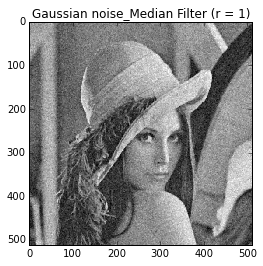

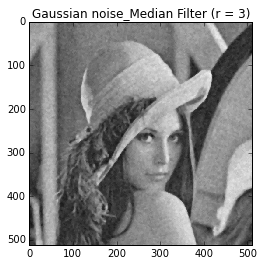

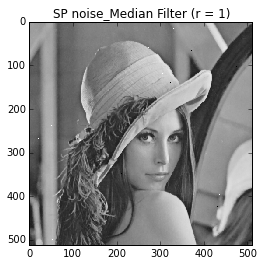

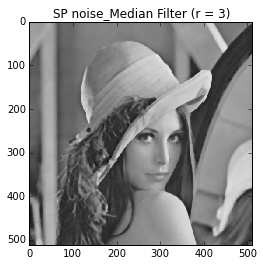

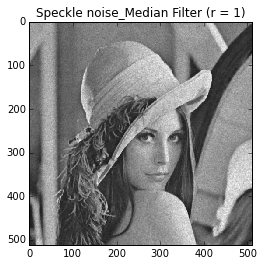

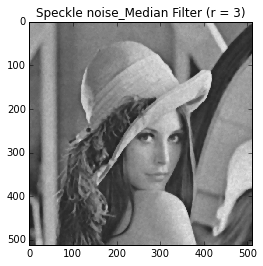

In [68]:
from skimage.filters.rank import median

avg = median(lena_gaussian, disk(1))
plt.figure()
io.imshow(avg)
plt.title('Gaussian noise_Median Filter (r = 1)')  

avg = median(lena_gaussian, disk(3))
plt.figure()
io.imshow(avg)
plt.title('Gaussian noise_Median Filter (r = 3)')  

avg = median(lena_sp, disk(1))
plt.figure()
io.imshow(avg)
plt.title('SP noise_Median Filter (r = 1)')   

avg = median(lena_sp, disk(3))
plt.figure()
io.imshow(avg)
plt.title('SP noise_Median Filter (r = 3)') 

avg = median(lena_speckle, disk(1))
plt.figure()
io.imshow(avg)
plt.title('Speckle noise_Median Filter (r = 1)')   

avg = median(lena_speckle, disk(3))
plt.figure()
io.imshow(avg)
plt.title('Speckle noise_Median Filter (r = 3)') 

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

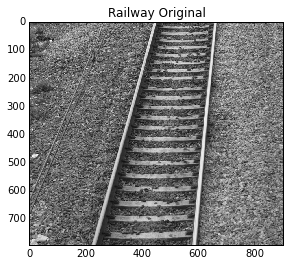

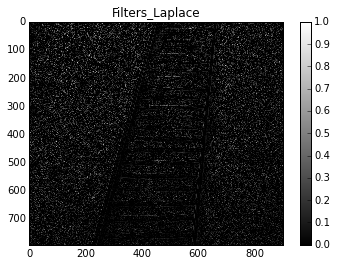

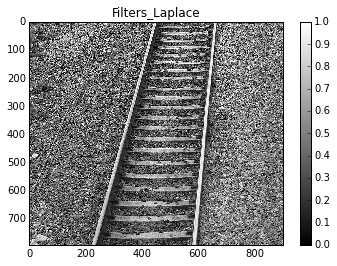

In [88]:
Path = './images/'
rail_im = io.imread(Path.__add__('railway.jpg'), as_grey=True)
rail_im = img_as_float(rail_im)

plt.figure()
io.imshow(rail_im)
plt.title('Railway Original') 

lapR = ndimage.filters.laplace(rail_im)

plt.figure()
io.imshow(lapR, cmap = cm.gray, vmin = 0, vmax = 1)
plt.title('Filters_Laplace') 

rail_sharp = rail_im - lapR
plt.figure()
io.imshow(rail_sharp, cmap = cm.gray, vmin = 0, vmax = 1)
plt.title('Filters_Laplace') 

#im=(im-min(im(:)))/(max(im(:))-min(im(:)))


## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**